# Task 1 - Perform Data Cleaning
 - Clean a dataset by removing missing values and outliers

- The data - There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing data

In [3]:
titanic_train = pd.read_csv(r'C:\Users\paruc\OneDrive\Desktop\Work\TechnoHacks\train.csv')
titanic_test = pd.read_csv(r'C:\Users\paruc\OneDrive\Desktop\Work\TechnoHacks\test.csv')

In [4]:
gender_submission = pd.read_csv(r'C:\Users\paruc\OneDrive\Desktop\Work\TechnoHacks\gender_submission.csv')

In [5]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [6]:
titanic_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [7]:
gender_submission.head(1)

,PassengerId,Survived
0,892,0


# Dropping irrelevant columns

- Name, Ticket, PassengerId is irrelevant attributes so we can drop the attributes

In [8]:
titanic_train = titanic_train.drop(['Name', 'Ticket','PassengerId'], axis =1)

In [9]:
titanic_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


In [10]:
titanic_test = titanic_test.drop(['Name', 'Ticket', 'PassengerId'], axis =1)

In [11]:
titanic_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q


# Information about data

In [12]:
#!pip install sweetviz

In [13]:
#import sweetviz as sv

#my_report = sv.analyze(titanic_train)
#my_report.show_html("eda.html")

In [14]:
pwd

'C:\\Users\\paruc\\Data Science\\TechnoHacks'

In [15]:
print('Train data {}'.format(titanic_train.shape))
print('Test data {}'.format(titanic_test.shape))

Train data (891, 9)
Test data (418, 8)


In [16]:
tr = titanic_train.columns
tr

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [17]:
ts = titanic_test.columns
ts

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [18]:
com = tr.intersection(ts)
len(com)

8

In [19]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [22]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
titanic_test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [24]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [25]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [26]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [27]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

# Calculating null values Percentage

In [28]:
round(titanic_train.isnull().sum()/ titanic_train.shape[0]*100)

Survived     0.0
Pclass       0.0
Sex          0.0
Age         20.0
SibSp        0.0
Parch        0.0
Fare         0.0
Cabin       77.0
Embarked     0.0
dtype: float64

In [29]:
null_titanic_train = pd.DataFrame(titanic_train.isnull().sum()* 100/titanic_train.shape[0]).reset_index()
null_titanic_train.columns = ['Columns','Null Values Percentage']

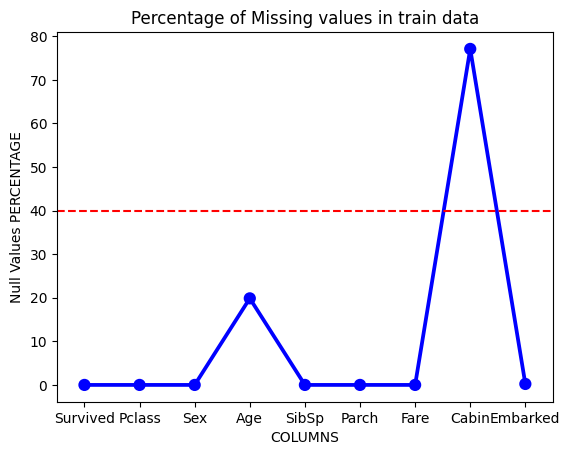

In [30]:
ax = sns.pointplot(x = 'Columns',y = 'Null Values Percentage', data = null_titanic_train, color = 'blue')
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in train data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [31]:
round(titanic_test.isnull().sum()/ titanic_test.shape[0]*100)

Pclass       0.0
Sex          0.0
Age         21.0
SibSp        0.0
Parch        0.0
Fare         0.0
Cabin       78.0
Embarked     0.0
dtype: float64

In [32]:
null_titanic_test = pd.DataFrame(titanic_test.isnull().sum()* 100/titanic_test.shape[0]).reset_index()
null_titanic_test.columns = ['Columns','Null Values Percentage']

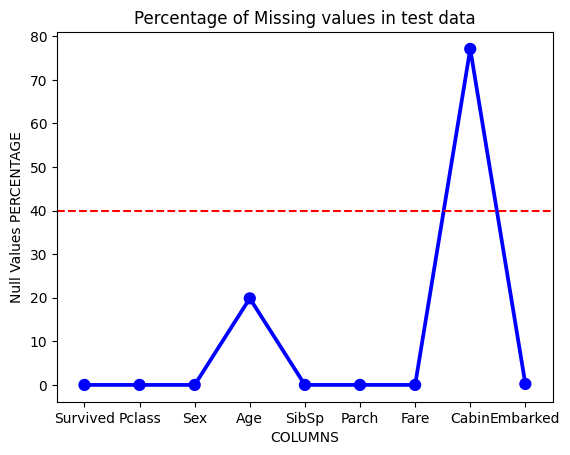

In [33]:
ax = sns.pointplot(x = 'Columns',y = 'Null Values Percentage', data = null_titanic_train, color = 'blue')
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in test data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

- Dropping Cabin in train and test dataset because it had more 60% of null values

In [34]:
titanic_train = titanic_train.drop(['Cabin'], axis = 1)

In [35]:
titanic_test = titanic_test.drop(['Cabin'], axis = 1)

In [36]:
titanic_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [37]:
titanic_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q


# Handling missing values  - Training data

- Age - float type(By changing this column to groups and filled by most frequent values based on survived column)
- Cabin - object type(Dropping this column because it had more 60% of null values)
- Fare - object type(dropped rows by using dropna because it has only 2 missing values)

In [38]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [39]:
titanic_train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [40]:
titanic_train['Age'].min()

0.42

In [41]:
a=titanic_train['Age'].to_list()

In [42]:
def categorize_age(age):
    if 1 <= age <= 12:
        return 'Child'
    elif 12 < age <= 18:
        return 'Immature'
    elif 18 < age <= 30:
        return 'Adult'
    elif 30 < age <= 50:
        return 'Mid senior'
    elif 50 < age <= 80:
        return 'Senior'

# Apply the function to the 'age' column
titanic_train['age_category'] = titanic_train['Age'].apply(categorize_age)

In [43]:
# Display the DataFrame
titanic_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_category
0,0,3,male,22.0,1,0,7.25,S,Adult


In [44]:
titanic_train['age_category'].value_counts()

age_category
Adult         270
Mid senior    241
Immature       70
Senior         64
Child          62
Name: count, dtype: int64

In [45]:
titanic_train['age_category'].isnull().sum()

184

In [46]:
pd.crosstab(titanic_train['age_category'],titanic_train['Survived'],margins=True)

Survived,0,1,All
age_category,,,
Adult,174,96,270
Child,29,33,62
Immature,40,30,70
Mid senior,139,102,241
Senior,42,22,64
All,424,283,707


In [47]:
titanic_train['age_category']=np.where(titanic_train['age_category'].isnull()==True,"Unknown",titanic_train['age_category'])

In [48]:
pd.crosstab(titanic_train['age_category'],titanic_train['Survived'],margins=True)

Survived,0,1,All
age_category,,,
Adult,174,96,270
Child,29,33,62
Immature,40,30,70
Mid senior,139,102,241
Senior,42,22,64
Unknown,125,59,184
All,549,342,891


In [49]:
d=[]
for i,j in zip(titanic_train['age_category'],titanic_train['Survived']):
    if j==0:
        c=i.replace("Unknown","Adult")
        d.append(c)
    else:
        c=i.replace("Unknown","Mid senior")
        d.append(c)
        

In [50]:
d

['Adult',
 'Mid senior',
 'Adult',
 'Mid senior',
 'Mid senior',
 'Adult',
 'Senior',
 'Child',
 'Adult',
 'Immature',
 'Child',
 'Senior',
 'Adult',
 'Mid senior',
 'Immature',
 'Senior',
 'Child',
 'Mid senior',
 'Mid senior',
 'Mid senior',
 'Mid senior',
 'Mid senior',
 'Immature',
 'Adult',
 'Child',
 'Mid senior',
 'Adult',
 'Adult',
 'Mid senior',
 'Adult',
 'Mid senior',
 'Mid senior',
 'Mid senior',
 'Senior',
 'Adult',
 'Mid senior',
 'Mid senior',
 'Adult',
 'Immature',
 'Immature',
 'Mid senior',
 'Adult',
 'Adult',
 'Child',
 'Adult',
 'Adult',
 'Adult',
 'Mid senior',
 'Adult',
 'Immature',
 'Child',
 'Adult',
 'Mid senior',
 'Adult',
 'Senior',
 'Mid senior',
 'Adult',
 'Adult',
 'Child',
 'Child',
 'Adult',
 'Mid senior',
 'Mid senior',
 'Child',
 'Adult',
 'Mid senior',
 'Adult',
 'Adult',
 'Immature',
 'Adult',
 'Mid senior',
 'Immature',
 'Adult',
 'Adult',
 'Mid senior',
 'Adult',
 'Adult',
 'Adult',
 'Mid senior',
 'Adult',
 'Adult',
 'Adult',
 'Mid senior',
 'Adul

In [51]:
b=pd.DataFrame(d)

In [52]:
df=pd.concat([b,titanic_train],axis=1)

In [53]:
df[0].value_counts()

0
Adult         395
Mid senior    300
Immature       70
Senior         64
Child          62
Name: count, dtype: int64

In [54]:
df.rename(columns={0: 'Age_Category'}, inplace=True)

In [55]:
df

,Age_Category,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_category
0,Adult,0,3,male,22.0,1,0,7.2500,S,Adult
1,Mid senior,1,1,female,38.0,1,0,71.2833,C,Mid senior
2,Adult,1,3,female,26.0,0,0,7.9250,S,Adult
3,Mid senior,1,1,female,35.0,1,0,53.1000,S,Mid senior
4,Mid senior,0,3,male,35.0,0,0,8.0500,S,Mid senior
...,...,...,...,...,...,...,...,...,...,...
886,Adult,0,2,male,27.0,0,0,13.0000,S,Adult
887,Adult,1,1,female,19.0,0,0,30.0000,S,Adult
888,Adult,0,3,female,NaN,1,2,23.4500,S,Unknown
889,Adult,1,1,male,26.0,0,0,30.0000,C,Adult


In [56]:
df = df.drop(['age_category','Age'], axis = 1)

In [57]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [58]:
df.dropna(inplace = True)

In [59]:
df.isnull().sum()

Age_Category    0
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

# Handling Missing values in test data

- Age - float type(By changing this column to groups and filled by most frequent values based on survived column)
- Cabin - object type(Dropping this column because it had more 60% of null values)
- Fare - object type(dropped rows by using dropna because it has only 2 missing values)

In [60]:
titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [61]:
df

,Age_Category,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,Adult,0,3,male,1,0,7.2500,S
1,Mid senior,1,1,female,1,0,71.2833,C
2,Adult,1,3,female,0,0,7.9250,S
3,Mid senior,1,1,female,1,0,53.1000,S
4,Mid senior,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,Adult,0,2,male,0,0,13.0000,S
887,Adult,1,1,female,0,0,30.0000,S
888,Adult,0,3,female,1,2,23.4500,S
889,Adult,1,1,male,0,0,30.0000,C


In [62]:
titanic_test['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [63]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mode().iloc[0])

In [64]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [65]:
titanic_test = titanic_test.dropna()

In [66]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
titanic_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [69]:
df

,Age_Category,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,Adult,0,3,male,1,0,7.2500,S
1,Mid senior,1,1,female,1,0,71.2833,C
2,Adult,1,3,female,0,0,7.9250,S
3,Mid senior,1,1,female,1,0,53.1000,S
4,Mid senior,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,Adult,0,2,male,0,0,13.0000,S
887,Adult,1,1,female,0,0,30.0000,S
888,Adult,0,3,female,1,2,23.4500,S
889,Adult,1,1,male,0,0,30.0000,C


# Encoding the data

In [68]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
cat = df[['Age_Category', 'Sex', 'Embarked']]

In [64]:
for i in cat:
    df[i] = le.fit_transform(df[i])

In [65]:
df.head(1)

,Age_Category,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,1,1,0,7.25,2


In [66]:
lt = LabelEncoder()

In [67]:
cat1 = titanic_test[['Sex', 'Embarked']]

In [68]:
for i in cat1:
    titanic_test[i] = lt.fit_transform(titanic_test[i])

In [69]:
titanic_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1


# Handling with outliers for train data

In [70]:
df.head(1)

,Age_Category,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,1,1,0,7.25,2


In [71]:
df['Parch'].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

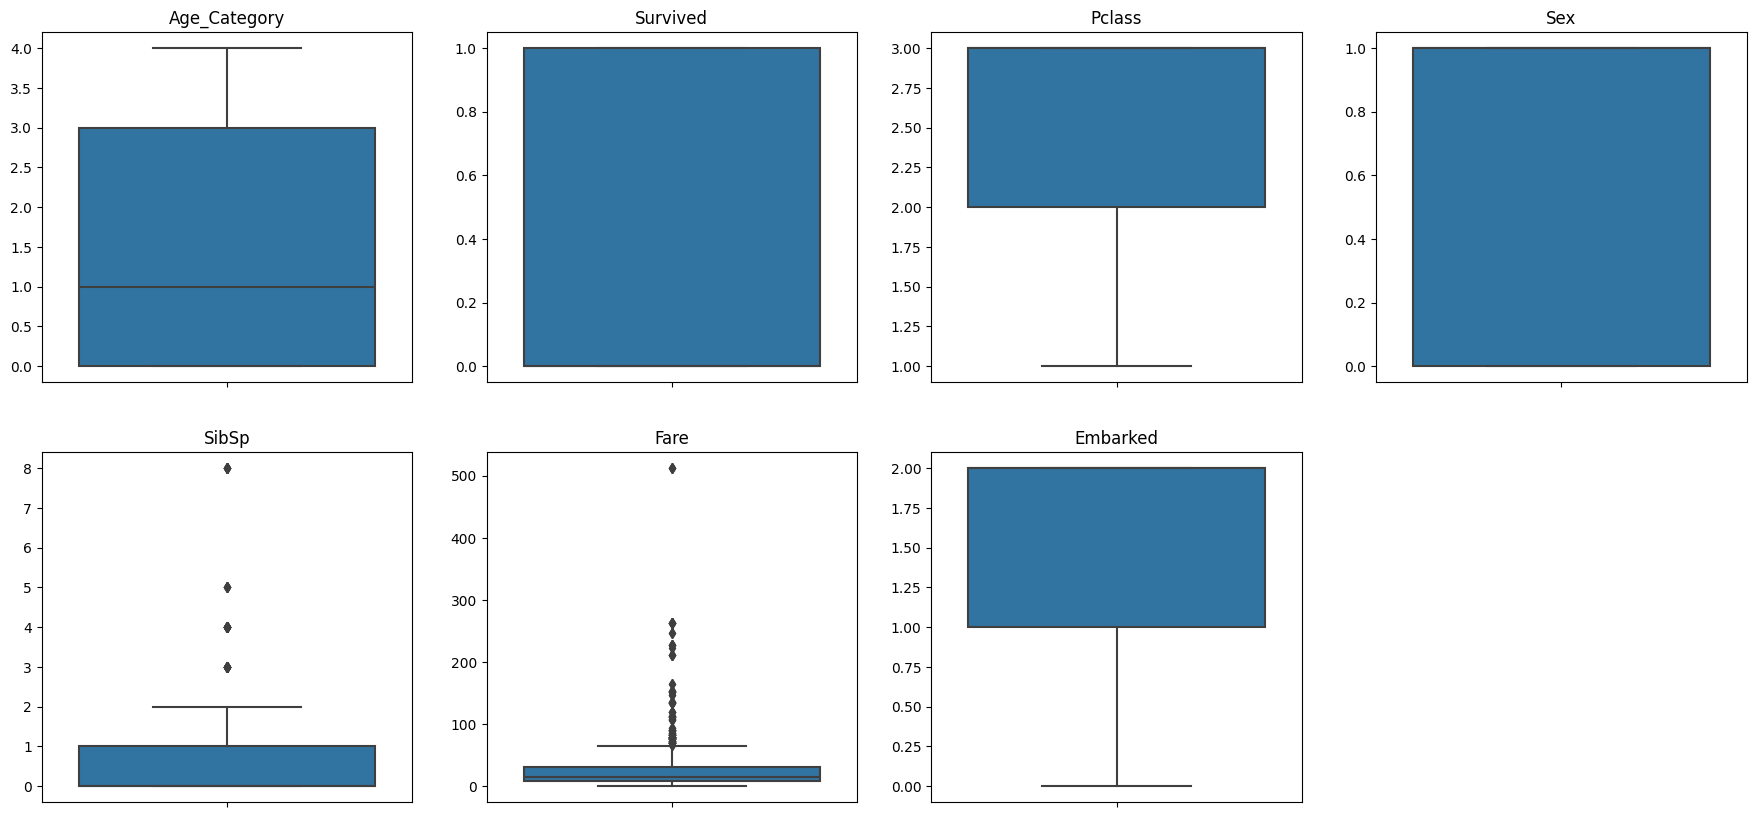

In [72]:
plt.figure(figsize=(22,10))

t = ['Age_Category', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked']
for i in enumerate(t):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

- from above Fare, SibSp attributes have outliers

In [73]:
out = df[['Fare', 'SibSp']]

In [74]:
for i in out:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.clip(df[i],lower_bound, upper_bound)

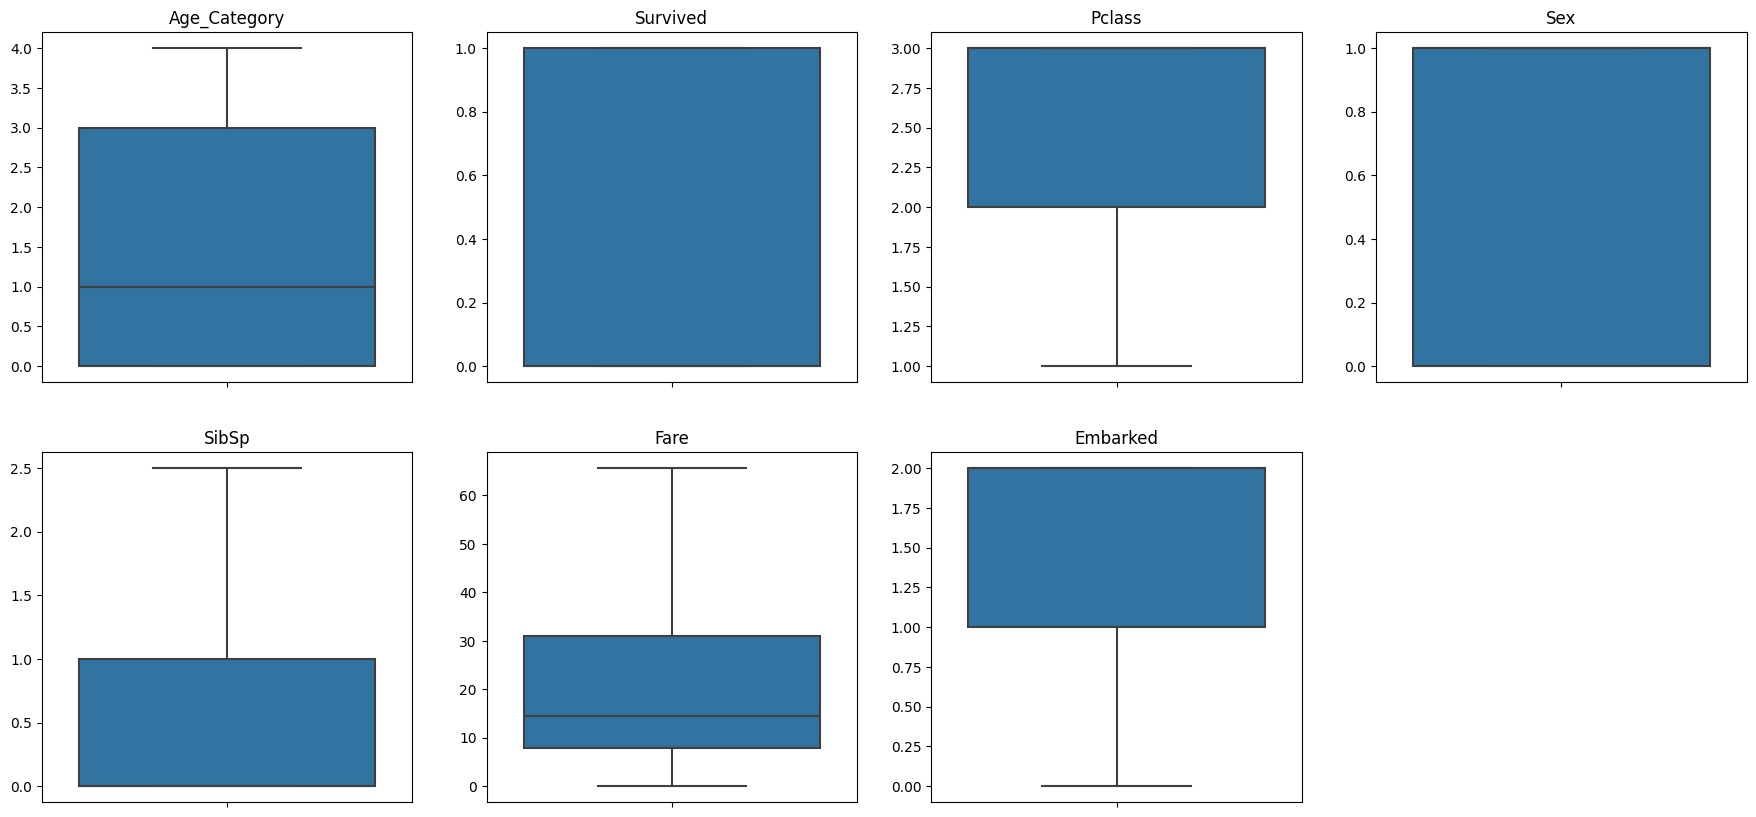

In [75]:
plt.figure(figsize=(22,10))

train = ['Age_Category', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Fare','Embarked']
for i in enumerate(train):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

# Hanling with outliers in test data

In [76]:
titanic_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2


In [77]:
titanic_test['Parch'].value_counts()

Parch
0    323
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

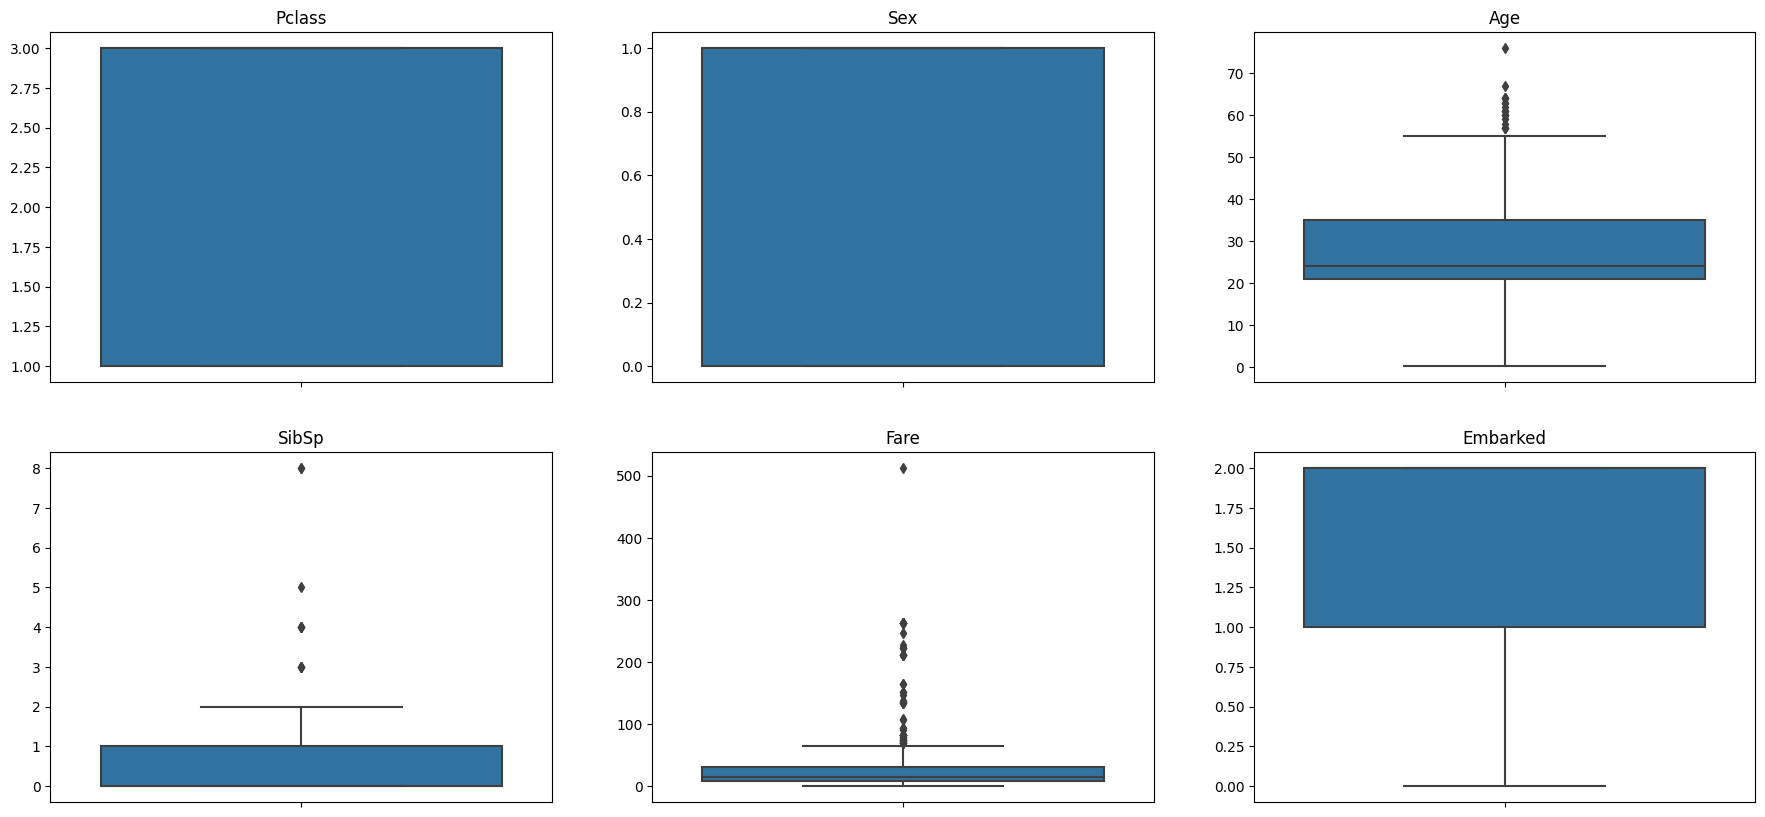

In [78]:
plt.figure(figsize=(22,10))

t1 = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare','Embarked']
for i in enumerate(t1):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=titanic_test[i[1]])
    plt.title(i[1])
    plt.ylabel("")

- Age, SibSp,Fare attributes have outliers

In [79]:
out1 = titanic_test[['Age', 'Fare', 'SibSp']]

In [80]:
for i in out1:
    q1 = np.percentile(titanic_test[i], 25)
    q3 = np.percentile(titanic_test[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    titanic_test[i] = np.clip(titanic_test[i],lower_bound, upper_bound)

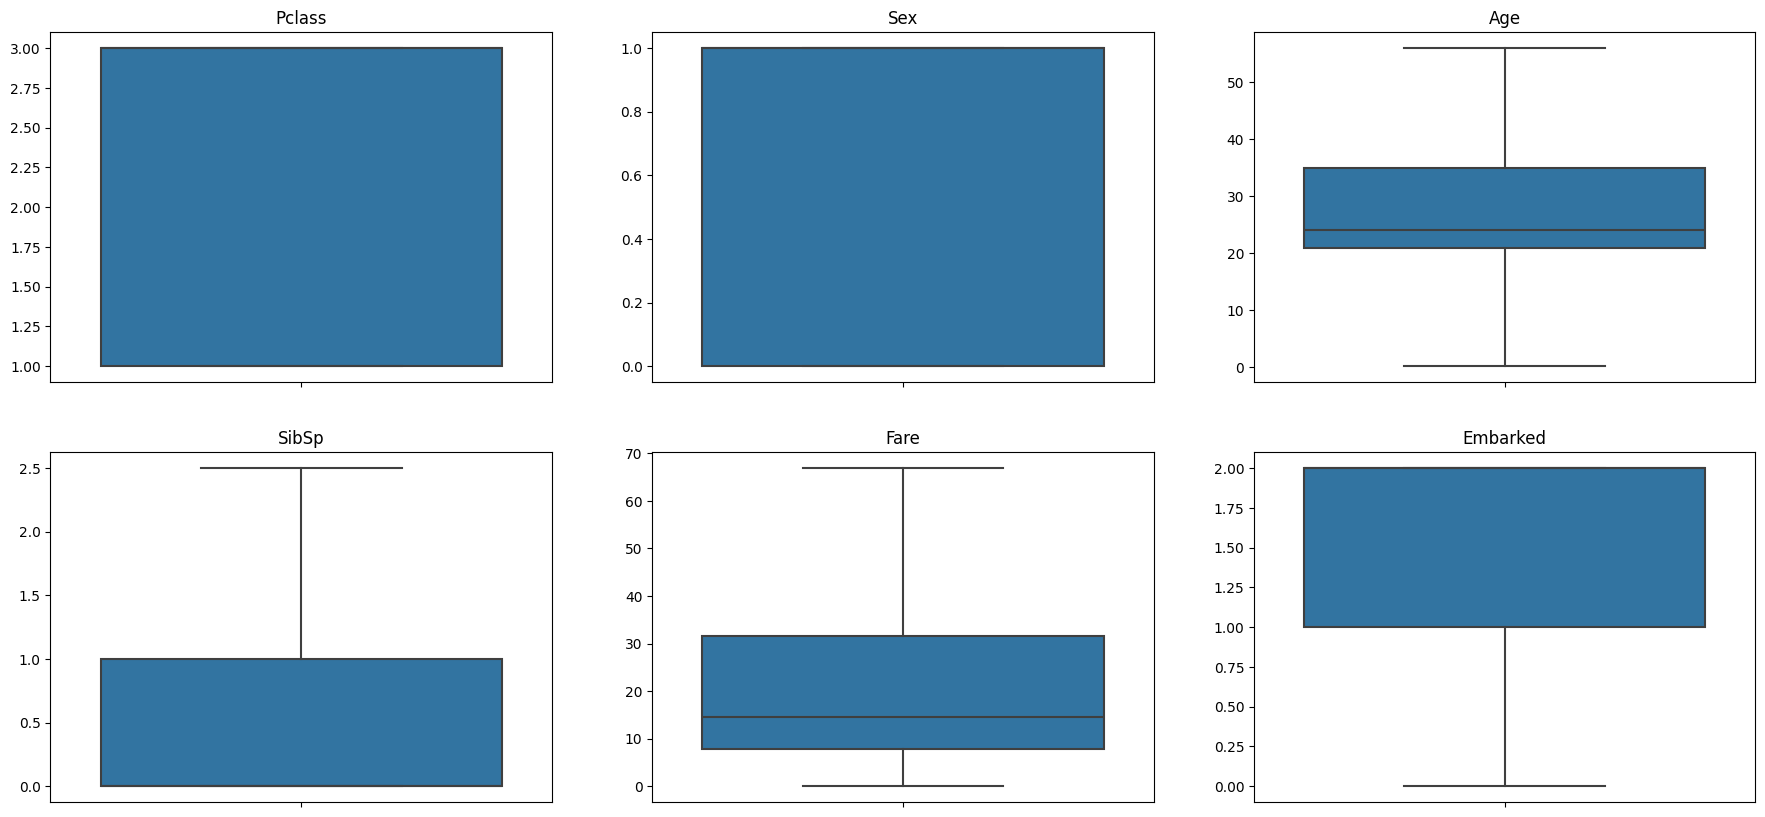

In [81]:
plt.figure(figsize=(22,10))

test = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare','Embarked']
for i in enumerate(test):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=titanic_test[i[1]])
    plt.title(i[1])
    plt.ylabel("")

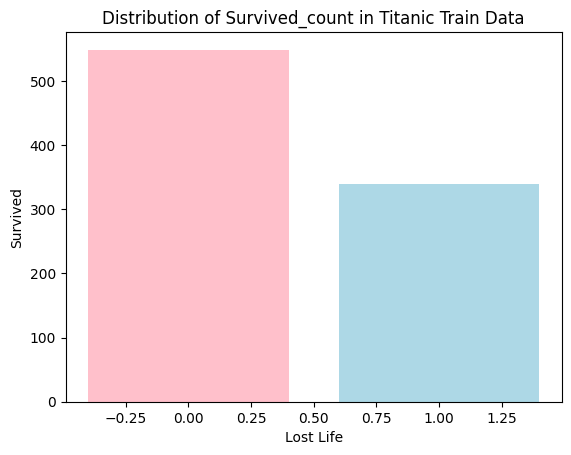

In [82]:
Survived_count = df['Survived'].value_counts()

# Create a bar chart
plt.bar(Survived_count.index, Survived_count, color=['pink', 'lightblue'])

# Add labels and title
plt.xlabel('Lost Life')
plt.ylabel('Survived')
plt.title('Distribution of Survived_count in Titanic Train Data')

# Show the plot
plt.show()

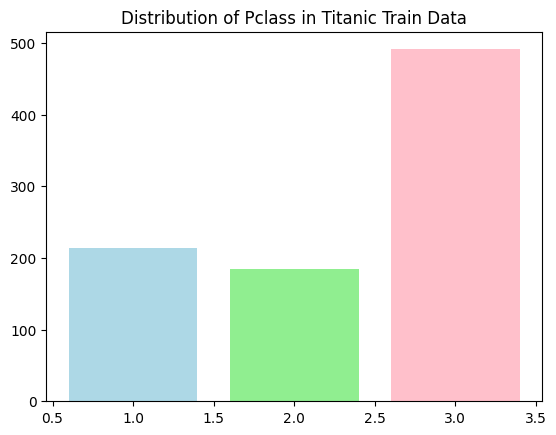

In [83]:
Pclass_counts = df['Pclass'].value_counts()

# Create a bar chart
plt.bar(Pclass_counts.index, Pclass_counts, color=['pink', 'lightblue','lightgreen'])

plt.title('Distribution of Pclass in Titanic Train Data')

# Show the plot
plt.show()

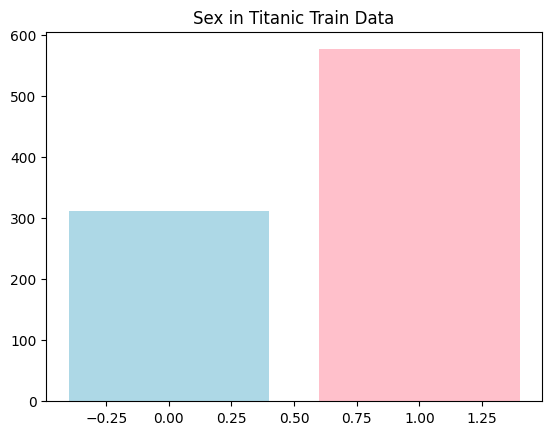

In [84]:
Sex_counts = df['Sex'].value_counts()

# Create a bar chart
plt.bar(Sex_counts.index, Sex_counts, color=['pink', 'lightblue'])

plt.title('Sex in Titanic Train Data')

# Show the plot
plt.show()

In [85]:
df.head()

,Age_Category,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,1,1.0,0,7.2500,2
1,3,1,1,0,1.0,0,65.6563,0
2,0,1,3,0,0.0,0,7.9250,2
3,3,1,1,0,1.0,0,53.1000,2
4,3,0,3,1,0.0,0,8.0500,2


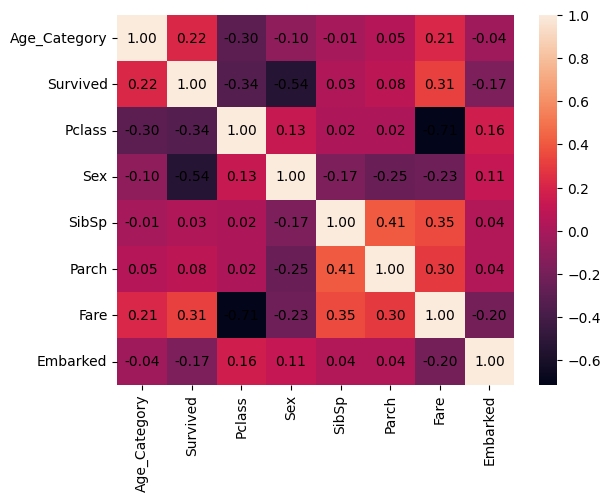

In [101]:
sns.heatmap(df.corr())
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        plt.text(j + 0.5, i + 0.5, f"{df.corr().iloc[i, j]:.2f}", ha='center', va='center', fontsize=10)
plt.show()